In [1]:
import pandas as pd
import numpy as np

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./Code FIles/Titanic.csv')
df.head()

plt.rcParams['figure.constrained_layout.use'] = True

In [3]:
# Observe data pattern
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Removing unused data from dataframe
df.drop('Name', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

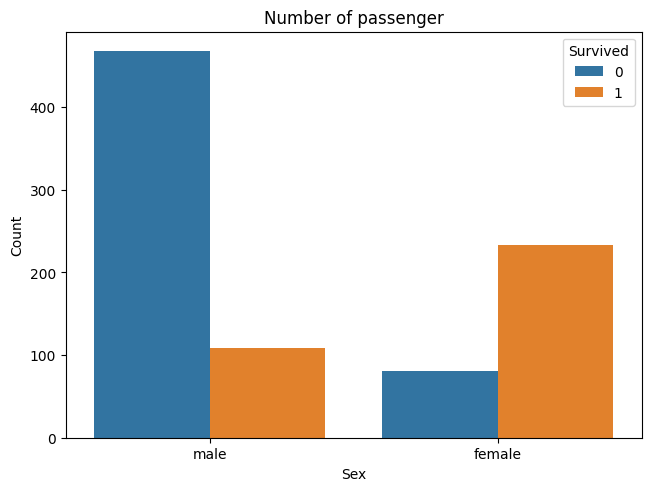

In [8]:
# Ploting number of survival by sex
sns.countplot(data = df, x="Sex", hue="Survived")
plt.title('Number of passenger')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

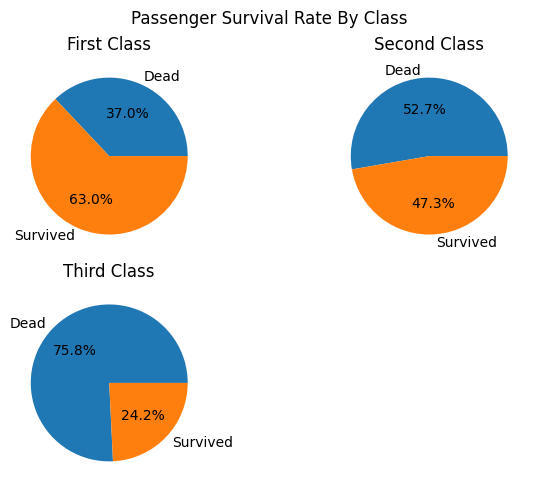

In [9]:
# Plotting pclass against survived
pclass_survived_grouped_df = df.groupby(['Pclass','Survived'])['Survived'].count()

plt.subplot(2,2,1)
plt.pie(pclass_survived_grouped_df[0:2], labels = ['Dead', 'Survived'], autopct='%1.1f%%')
plt.title('First Class')
plt.subplot(2,2,2)
plt.pie(pclass_survived_grouped_df[2:4], labels = ['Dead', 'Survived'], autopct='%1.1f%%')
plt.title('Second Class')
plt.subplot(2,2,3)
plt.pie(pclass_survived_grouped_df[4:6], labels = ['Dead', 'Survived'], autopct='%1.1f%%')
plt.title('Third Class')
plt.suptitle('Passenger Survival Rate By Class')
plt.show()

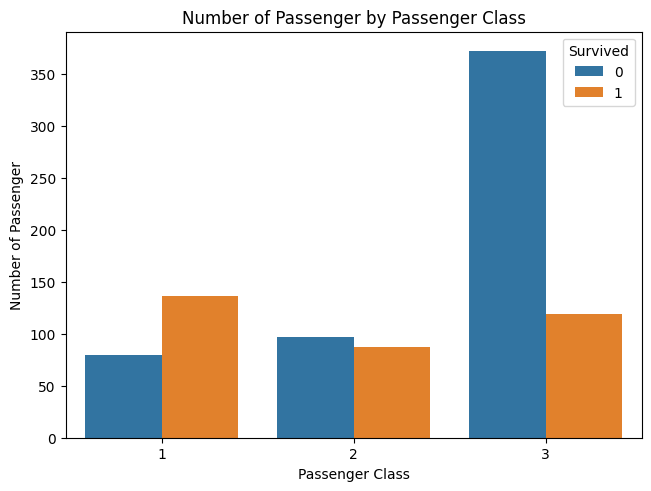

In [10]:
# Plotting number of passenger by pclass
sns.countplot(data = df, x="Pclass", hue="Survived")
plt.title("Number of Passenger by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passenger")
plt.show()

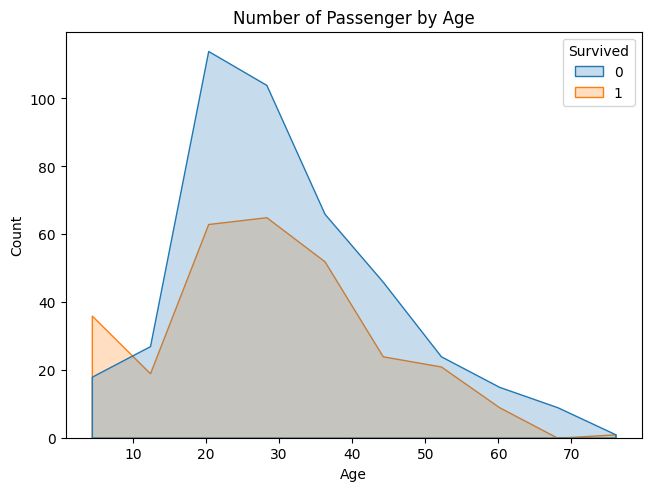

In [11]:
# Plotting number of passenger by age
sns.histplot(data = df, x="Age", bins=10, hue="Survived",element="poly")
plt.title("Number of Passenger by Age")
plt.show()

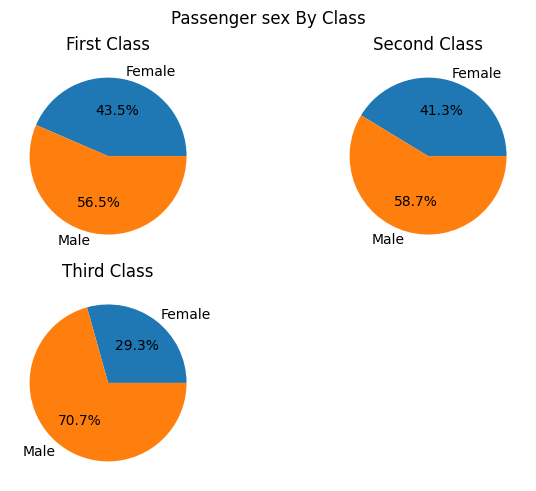

In [12]:
# Plotting percentage of passenger sex by class
pclass_sex_grouped_df = df.groupby(['Pclass','Sex'])['Pclass'].count()

plt.subplot(2,2,1)
plt.pie(pclass_sex_grouped_df[0:2], labels = ['Female', 'Male'], autopct='%1.1f%%')
plt.title('First Class')
plt.subplot(2,2,2)
plt.pie(pclass_sex_grouped_df[2:4], labels = ['Female', 'Male'], autopct='%1.1f%%')
plt.title('Second Class')
plt.subplot(2,2,3)
plt.pie(pclass_sex_grouped_df[4:6], labels = ['Female', 'Male'], autopct='%1.1f%%')
plt.title('Third Class')
plt.suptitle('Passenger sex By Class')
plt.show()

# Observation
1. Being rish is a important factor to survive in Titanic incident. By comparing survival rate of each passenger class, first class passenger have a survival rate 63% which is 38.8% higher then third class passenger.
2. However, if we look into the number of survival, every class has similar number of survivor. It is an interesting finding as it means every passenger class could have similar number of lifeboats.
3. By looking at survival rate by sex and survivor number by age, we can con clude that "Women and children first" is true.
4. There are more male passenger on titanic. Furthermore, there are over 70% of third class passenger is male.